<img src="http://www.exalumnos.usm.cl/wp-content/uploads/2015/06/Isotipo-Negro.gif" title="Title text" width="30%" />

<hr style="height:2px;border:none"/>
<h1 align='center'> INF-395/477 Redes Neuronales Artificiales I-2020 </h1>

<H3 align='center'> Tarea 1 - Redes Neuronales y *Deep Learning* </H3>
<hr style="height:2px;border:none"/>

**Temas**  

* Arquitectura Básica de Redes Neuronales. Redes *Feed-Forward*
* Entrenamiento de Redes Neuronales. 
* Redes Convolucionales. 

**Formalidades**  
* Equipos de trabajo de: 3 personas (*cada uno debe estar en condiciones de realizar una presentación y discutir sobre cada punto del trabajo realizado*)
* Formato de entrega: envı́o de link Github y link de video Youtube o plataforma a convenir, todo esto vía Aula. 

<hr style="height:2px;border:none"/>

### **Propuesta**
* Se debe preparar una presentación de **15 a 20 minutos** donde se explique el cómo se va a realizar/resolver el taller, la metodología o propuesta de las componentes a experimentar y explorar. Más detalles en el Syllabus.
* Fecha de encuentro Zoom: 8 de Mayo en horario de clases.
* Fecha de entrega de vídeo: Opcional para quienes presentaron y obligatorio para quienes no, a lo más 2 días después del encuentro.
* Modalidad de Presentación (Zoom): En el primer bloque, se formarán 3 grupos para que alcancen a recibir feedback todos los equipos. En el segundo bloque, algunos equipos seleccionados presentarán a todo el curso. 

**Aún si la idea es aprender colaborativamente, valoraremos mucho la diversidad de ideas, por lo que las propuesta debiesen conservar su orientación inicial, excepto por el feedback que les entreguemos**

### **Defensa**
* Se debe preparar una presentación de **15 a 20 minutos** con los resultados obtenidos y conclusiones de la experiencia. 
* Se debe entregar el código, de preferencia en un (breve) Jupyter/IPython notebook, de modo que **permita reproducir los resultados** presentados. Si se entrega el código fuente se deben proveer instrucciones para su uso.
* Fecha de encuentro Zoom: 29 de Mayo, horario de clases.
* Fecha de entrega de vídeo: 27 de Mayo (2 días antes de encuentro).
* Fecha de entrega de Jypter (notebook): 27 de Mayo (commits hasta el 29 de Mayo en horario de clases). 
* Modalidad de Presentación (Zoom): En ambos bloques algunos equipos seleccionados presentarán ante todo el curso, discusión y debate se generará en base a los resultados.

<hr style="height:2px;border:none"/>

La tarea se divide en secciones:

[1.](#primero) Pregunta Libre   
[2.](#segundo) Challenge Kaggle

<a id="segundo"></a>
## 2. Challenge Kaggle

[Descripción](https://www.kaggle.com/c/taller1ann-usm/overview/description)

In [1]:
import matplotlib.image as img
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import cv2
import glob
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D, BatchNormalization, ZeroPadding2D
from keras.utils import to_categorical
from keras.preprocessing.image import ImageDataGenerator
from sklearn.preprocessing import LabelEncoder
import csv


Using TensorFlow backend.


### Procesamiento de datos.
Para facilitar el trabajo en Colab guardamos las imagenes de entrenamiento y de prueba en un repositorio en GitHub.

In [2]:
!git clone https://github.com/godinezseba/Tarea-1-RedesNeuronales


fatal: destination path 'Tarea-1-RedesNeuronales' already exists and is not an empty directory.


Primero se extraen las imagenes que fueron guardadas previamente en nuestro repositorio. Luego se lee cada una y se guarda en arreglo.

In [3]:
%cd Tarea-1-RedesNeuronales/train_images

urlY = 'https://raw.githubusercontent.com/godinezseba/Tarea-1-RedesNeuronales/master/Datasets/kaggle_train_labels.csv'
train = pd.read_csv(urlY)
y_labels = train["Expected"].values

X_data = []
for i in range(9212):
  file_name = "train_"+str(i)+".jpg"
  image = cv2.imread (file_name)
  X_data.append(image)

X_data = np.array(X_data)
X_data.shape

/content/Tarea-1-RedesNeuronales/train_images


(9212, 128, 128, 3)

Luego se transforman las etiquetas a valores numericos.

In [0]:
le = LabelEncoder()

y = le.fit_transform(y_labels)
LABELS = ['altar' 'apse' 'bell_tower' 'column' 'dome_inner' 'dome_outer'
 'flying_buttress' 'gargoyle' 'stained_glass' 'vault']

Para poder comparar los resultados obtenidos por nuestra red se separa los datos en datos de entrenamiento y datos de validacion. Donde aproximadamente el 20% de los datos son de validacion.
Luego se divide la matriz _X_ por 255, esto es con el objetivo de que la red converja mas rapido.

In [0]:
train_datagen = ImageDataGenerator(
  rescale=1./255,
  horizontal_flip=True)

X_train, X_val, y_train, y_val = train_test_split(X_data, y, test_size=0.2)

y_train = to_categorical(y_train) #transform to matrix
y_val = to_categorical(y_val) #transform to matrix

Xnorm_val = X_val.astype('float32')/255
train_datagen.fit(X_train)

### Creacion y entrenamiento de la Red
La red que utilizaremos es una Red convolucional que se caracteriza por ser un par de capas convulacionales, luego se hace Pooling, luego se normalizan los resultados que quedan y se repite el proceso.

In [0]:
model = Sequential()
model.add(Conv2D(32, (3, 3), padding='same', input_shape=X_train.shape[1:], activation='relu'))
model.add(Conv2D(32, (3, 3), padding='same',activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(BatchNormalization())
for filter in [64, 128, 256, 64, 128, 256]:
  model.add(Conv2D(filter, (3, 3), padding='same',activation='relu'))
  model.add(Conv2D(filter, (3, 3), padding='same',activation='relu'))
  model.add(MaxPooling2D(pool_size=(2, 2)))
  model.add(BatchNormalization())
  model.add(Dropout(0.25))
model.add(Flatten())
for i in range(5):
  model.add(Dense(512, activation='relu'))
model.add(Dense(10, activation='softmax'))
model.compile(loss='categorical_crossentropy',optimizer='Adam',metrics=['accuracy'])

In [6]:
model = Sequential()
model.add(Conv2D(32, (3, 3), padding='same', input_shape=X_train.shape[1:], activation='relu'))
model.add(Conv2D(32, (3, 3), padding='same',activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(BatchNormalization())
model.add(Conv2D(64, (3, 3), padding='same',activation='relu'))
model.add(Conv2D(64, (3, 3), padding='same',activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(BatchNormalization())
model.add(Dropout(0.25))
model.add(Conv2D(128, (3, 3), padding='same',activation='relu'))
model.add(Conv2D(128, (3, 3), padding='same',activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(BatchNormalization())
model.add(Dropout(0.25))
model.add(Conv2D(256, (3, 3), padding='same',activation='relu'))
model.add(Conv2D(256, (3, 3), padding='same',activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(BatchNormalization())
model.add(Dropout(0.25))
model.add(Conv2D(64, (3, 3), padding='same',activation='relu'))
model.add(Conv2D(64, (3, 3), padding='same',activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(BatchNormalization())
model.add(Dropout(0.25))
model.add(Conv2D(128, (3, 3), padding='same',activation='relu'))
model.add(Conv2D(128, (3, 3), padding='same',activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(BatchNormalization())
model.add(Dropout(0.25))
model.add(Conv2D(256, (3, 3), padding='same',activation='relu'))
model.add(Conv2D(256, (3, 3), padding='same',activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(BatchNormalization())
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dense(512, activation='relu'))
model.add(Dense(512, activation='relu'))
model.add(Dense(512, activation='relu'))
model.add(Dense(512, activation='relu'))
model.add(Dense(10, activation='softmax'))
model.compile(loss='categorical_crossentropy',optimizer='Adam',metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 128, 128, 32)      896       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 128, 128, 32)      9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 64, 64, 32)        0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 64, 64, 32)        128       
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 64, 64, 64)        18496     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 64, 64, 64)        36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 32, 32, 64)       

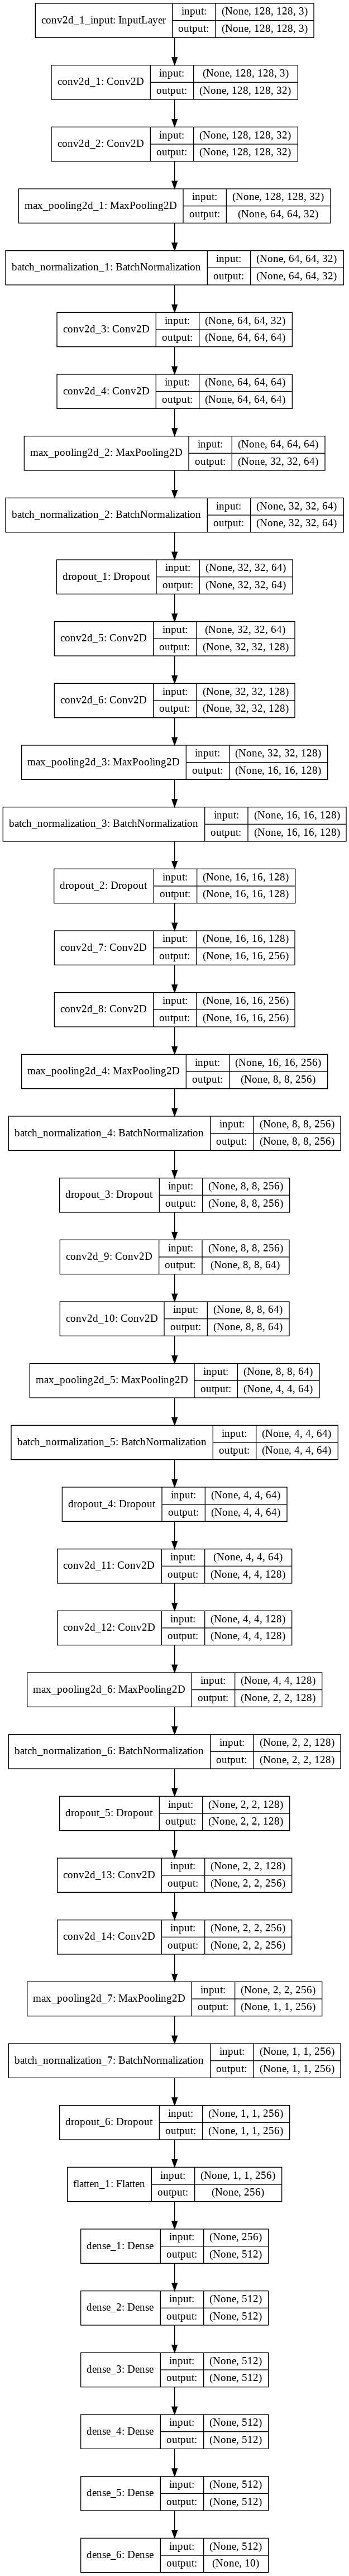

In [13]:
from keras.utils.vis_utils import plot_model
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

Luego de compilar la Red se procede a entrenar los datos previamente normalizados.

In [7]:
epochs = 60
history = model.fit(train_datagen.flow(X_train, y_train),
          steps_per_epoch=len(X_train) / 32,
          epochs=epochs,
          validation_data=(Xnorm_val, y_val))

Epoch 1/60
231/230 [==============================] - 16s 69ms/step - loss: 1.7492 - accuracy: 0.3648 - val_loss: 7.3983 - val_accuracy: 0.0716
Epoch 2/60
231/230 [==============================] - 11s 50ms/step - loss: 1.4941 - accuracy: 0.4872 - val_loss: 1.9654 - val_accuracy: 0.4466
Epoch 3/60
231/230 [==============================] - 12s 50ms/step - loss: 1.3448 - accuracy: 0.5539 - val_loss: 2.0103 - val_accuracy: 0.3755
Epoch 4/60
231/230 [==============================] - 12s 50ms/step - loss: 1.1941 - accuracy: 0.6067 - val_loss: 1.1627 - val_accuracy: 0.6283
Epoch 5/60
231/230 [==============================] - 12s 50ms/step - loss: 1.0824 - accuracy: 0.6516 - val_loss: 1.9957 - val_accuracy: 0.4737
Epoch 6/60
231/230 [==============================] - 12s 50ms/step - loss: 0.9899 - accuracy: 0.6857 - val_loss: 1.3634 - val_accuracy: 0.6191
Epoch 7/60
231/230 [==============================] - 12s 51ms/step - loss: 0.9090 - accuracy: 0.7134 - val_loss: 1.1306 - val_accuracy:

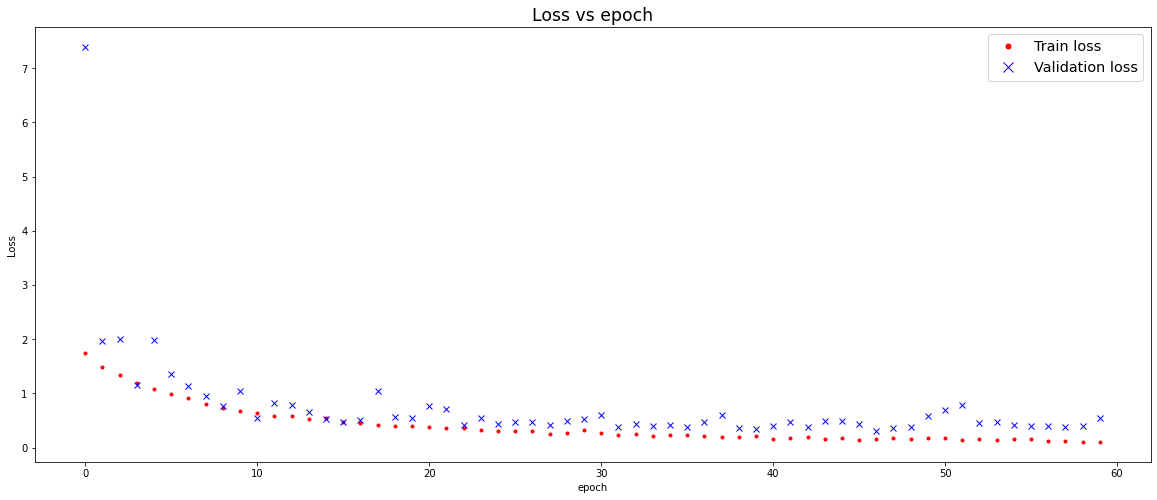

In [19]:
from matplotlib.lines import Line2D

fig, ax = plt.subplots(1, 1, figsize=(20,8))
ax.plot(range(epochs), history.history["loss"], 'r.')
ax.plot(range(epochs), history.history["val_loss"], 'bx')
ax.set_ylabel('Loss')
ax.set_xlabel('epoch')

h = (Line2D([], [], lw=0, color='red', marker=".", markersize=10), 
      Line2D([], [], lw=0, color='blue', marker='x', markersize=10))

l = ("Train loss", "Validation loss")
ax.legend(h, l, loc='upper right', fontsize='x-large')
ax.set_title("Loss vs epoch", fontsize='xx-large')

plt.show()

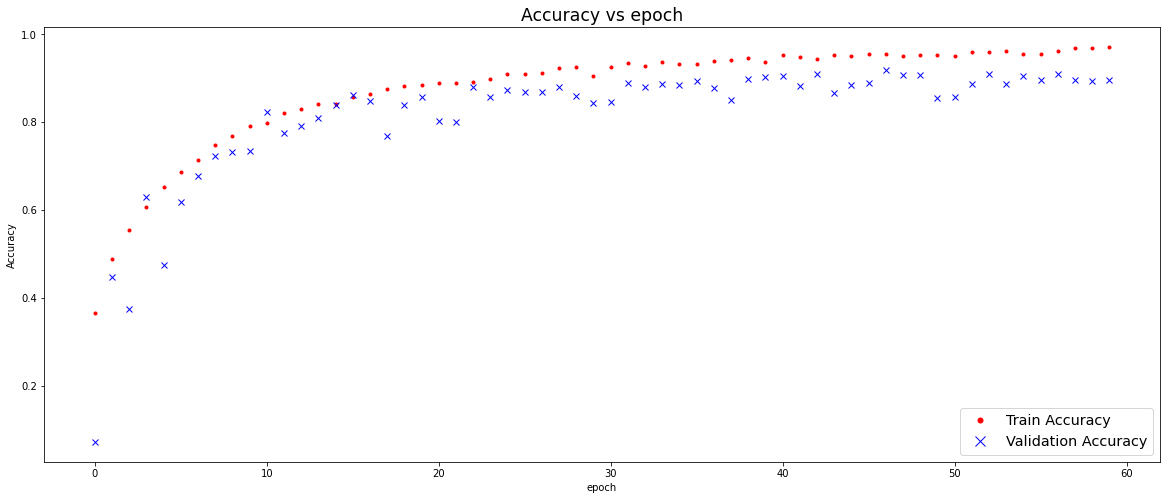

In [21]:
fig, ax = plt.subplots(1, 1, figsize=(20,8))
ax.plot(range(epochs), history.history["accuracy"], 'r.')
ax.plot(range(epochs), history.history["val_accuracy"], 'bx')
ax.set_ylabel('Accuracy')
ax.set_xlabel('epoch')

h = (Line2D([], [], lw=0, color='red', marker=".", markersize=10), 
      Line2D([], [], lw=0, color='blue', marker='x', markersize=10))

l = ("Train Accuracy", "Validation Accuracy")
ax.legend(h, l, loc='lower right', fontsize='x-large')
ax.set_title("Accuracy vs epoch", fontsize='xx-large')

plt.show()

### Prediccion de los casos de prueba
Luego de entrenar los datos se extraen los datos de prueba para predecir sus categorias. Para esto se hace un proceso similar a los datos de entrenamiento.

In [10]:
%cd ../test_images
X_test = []
for i in range(1023):
  file_name = "test_"+str(i)+".jpg"
  image = cv2.imread (file_name)
  X_test.append(image)

X_test = np.array(X_test)

Xnorm_test = X_test.astype('float32')/255
Xnorm_test.shape

/content/Tarea-1-RedesNeuronales/test_images


(1023, 128, 128, 3)

In [0]:
prediction = model.predict_classes(Xnorm_test)

pred = le.inverse_transform(prediction)

In [12]:
%cd ../Datasets

sample = pd.read_csv('kaggle_sample_submission.csv')

sample['Expected'] = pred
sample.to_csv('sample_cnn.csv', header=True, index=False)

/content/Tarea-1-RedesNeuronales/Datasets
